# Road Condition Classification

In [6]:
import numpy as np
import pandas as pd
import warnings
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
warnings.filterwarnings('ignore')

In [7]:
def convert_to_interval_road(df_sensor,road):
    len_sensor = len(df_sensor)
    data = list()
    for k in range(0,len_sensor,25):
        current_interval = df_sensor[k:k+25]
        meanSpeed = current_interval['speed'].mean()
        sdSpeed = current_interval['speed'].std()
        maxAccelX = max(current_interval['accelerometerX'])
        maxAccelY = max(current_interval['accelerometerY'])
        maxAccelZ = max(current_interval['accelerometerZ'])
        maxGyroX = max(current_interval['gyroX'])
        maxGyroY = max(current_interval['gyroY'])
        maxGyroZ = max(current_interval['gyroZ'])
        minAccelX = min(current_interval['accelerometerX'])
        minAccelY = min(current_interval['accelerometerY'])
        minAccelZ = min(current_interval['accelerometerZ'])
        minGyroX = min(current_interval['gyroX'])
        minGyroY = min(current_interval['gyroY'])
        minGyroZ = min(current_interval['gyroZ'])
        meanAccelX = current_interval['accelerometerX'].mean()
        meanAccelY = current_interval['accelerometerY'].mean()
        meanAccelZ = current_interval['accelerometerZ'].mean()
        sdAccelX = current_interval['accelerometerX'].std()
        sdAccelY = current_interval['accelerometerY'].std()
        sdAccelZ = current_interval['accelerometerZ'].std()
        meanGyroX = current_interval['gyroX'].mean()
        meanGyroY = current_interval['gyroY'].mean()
        meanGyroZ = current_interval['gyroZ'].mean()
        sdGyroX = current_interval['gyroX'].std()
        sdGyroY = current_interval['gyroY'].std()
        sdGyroZ = current_interval['gyroZ'].std()
        if road == "g":
            condition = 0
        else:
            condition = 1
        
        datapoint = [meanSpeed, sdSpeed, maxAccelX, maxAccelY, maxAccelZ, maxGyroX, maxGyroY, 
                           maxGyroZ, minAccelX, minAccelY, minAccelZ, minGyroX, minGyroY, minGyroZ, 
                           meanAccelX, meanAccelY, meanAccelZ, meanGyroX, meanGyroY, meanGyroZ,
                           sdAccelX, sdAccelY, sdAccelZ, sdGyroX, sdGyroY, sdGyroZ, condition]
        data.append(datapoint)
    df = pd.DataFrame.from_records(data)
    df.columns = ["meanSpeed", "sdSpeed", "maxAccelX", "maxAccelY", "maxAccelZ", "maxGyroX", "maxGyroY", 
                           "maxGyroZ", "minAccelX", "minAccelY", "minAccelZ", "minGyroX", "minGyroY", "minGyroZ", 
                           "meanAccelX", "meanAccelY", "meanAccelZ", "meanGyroX", "meanGyroY", "meanGyroZ",
                           "sdAccelX", "sdAccelY", "sdAccelZ", "sdGyroX", "sdGyroY", "sdGyroZ", "condition"]
    
    return df
    


    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    

In [8]:
def conf_matrix(y_test,predicted_y):
    labels = ["false","true"]
    A = confusion_matrix(y_test,predicted_y)
    B = (((A.T)/(A.sum(axis=1))).T)
    C =(A/A.sum(axis=0))
    print ("#"*25,"Confusion_Matrix","#"*25)
    plt.figure(figsize=(4,4))
    sns.heatmap(A,annot=True, fmt='.2g', xticklabels=labels, yticklabels=labels,cmap = "YlGnBu")
    plt.xlabel("Predicted class")
    plt.ylabel("Original class")
    plt.show()
    print ("#"*25,"Precision","#"*25)
    plt.figure(figsize=(4,4))
    sns.heatmap(B,annot=True, fmt='.2g', xticklabels=labels, yticklabels=labels,cmap = "YlGnBu")
    plt.xlabel("Predicted class")
    plt.ylabel("Original class")
    plt.show()
    print ("#"*25,"Recall","#"*25)
    plt.figure(figsize=(4,4))
    sns.heatmap(C,annot=True, fmt='.2g', xticklabels=labels, yticklabels=labels,cmap = "YlGnBu")
    plt.xlabel("Predicted class")
    plt.ylabel("Original class")
    plt.show()

In [9]:
df = pd.DataFrame(columns=["meanSpeed", "sdSpeed", "maxAccelX", "maxAccelY", "maxAccelZ", "maxGyroX", "maxGyroY", 
                           "maxGyroZ", "minAccelX", "minAccelY", "minAccelZ", "minGyroX", "minGyroY", "minGyroZ", 
                           "meanAccelX", "meanAccelY", "meanAccelZ", "meanGyroX", "meanGyroY", "meanGyroZ",
                           "sdAccelX", "sdAccelY", "sdAccelZ", "sdGyroX", "sdGyroY", "sdGyroZ", "condition"])
for i in range(1,11):
  
    df_sensor = pd.read_csv('road_qualityData/'+'good%s_sensors.csv' % i)
    
    trip_df = convert_to_interval_road(df_sensor,"g")
    
    #print(trip_df.head(5))
    
    df = df.append(trip_df,ignore_index=True)
    
    
for i in range(1,6):
  
    df_sensor = pd.read_csv('road_qualityData/'+'bad%s_sensors.csv' % i)
    
    trip_df = convert_to_interval_road(df_sensor,"b")
    
    #print(trip_df.head(5))
    
    df = df.append(trip_df,ignore_index=True)


df.head(5)
    

,meanSpeed,sdSpeed,maxAccelX,maxAccelY,maxAccelZ,maxGyroX,maxGyroY,maxGyroZ,minAccelX,minAccelY,...,meanGyroX,meanGyroY,meanGyroZ,sdAccelX,sdAccelY,sdAccelZ,sdGyroX,sdGyroY,sdGyroZ,condition
0,1.4480,1.873593,0.081833,-0.892563,0.531357,0.030879,0.022563,0.025532,-0.012863,-0.972656,...,-0.026106,-0.011531,-0.000536,0.024824,0.026782,0.092917,0.030684,0.022975,0.014998,0
1,8.5456,1.651202,0.382187,-0.828186,0.428528,0.076003,0.368514,0.048106,-0.030273,-1.048843,...,-0.021130,0.026896,-0.028604,0.082117,0.041041,0.052897,0.051127,0.098617,0.068498,0
2,12.4456,0.601582,0.161774,-0.785294,0.576187,0.074529,0.229708,0.159245,-0.280014,-1.212280,...,-0.028434,0.004568,0.000934,0.111291,0.096310,0.096204,0.075677,0.088893,0.074676,0
3,12.6376,0.139591,0.179916,-0.803604,0.311172,0.090103,0.124027,0.106324,-0.162643,-1.069412,...,-0.023337,-0.054731,0.031761,0.104010,0.075777,0.047894,0.068000,0.084106,0.048881,0
4,12.9352,0.283301,0.145187,-0.882919,0.280197,0.101957,0.148029,0.127700,-0.123413,-1.033752,...,-0.008532,-0.055637,0.026456,0.074642,0.039988,0.033150,0.055188,0.099061,0.063591,0


In [10]:
df.isnull().values.any()

True

In [11]:
df = df.dropna()

In [12]:
df.shape

(459, 27)

In [13]:
y = df['condition']

In [14]:
pd.value_counts(y)

0    373
1     86
Name: condition, dtype: int64

In [15]:
df.to_csv("roadQuality.csv",index = False)

In [16]:
roadQuality = pd.read_csv("roadQuality.csv")

In [17]:
roadQuality.head(5)

,meanSpeed,sdSpeed,maxAccelX,maxAccelY,maxAccelZ,maxGyroX,maxGyroY,maxGyroZ,minAccelX,minAccelY,...,meanGyroX,meanGyroY,meanGyroZ,sdAccelX,sdAccelY,sdAccelZ,sdGyroX,sdGyroY,sdGyroZ,condition
0,1.4480,1.873593,0.081833,-0.892563,0.531357,0.030879,0.022563,0.025532,-0.012863,-0.972656,...,-0.026106,-0.011531,-0.000536,0.024824,0.026782,0.092917,0.030684,0.022975,0.014998,0
1,8.5456,1.651202,0.382187,-0.828186,0.428528,0.076003,0.368514,0.048106,-0.030273,-1.048843,...,-0.021130,0.026896,-0.028604,0.082117,0.041041,0.052897,0.051127,0.098617,0.068498,0
2,12.4456,0.601582,0.161774,-0.785294,0.576187,0.074529,0.229708,0.159245,-0.280014,-1.212280,...,-0.028434,0.004568,0.000934,0.111291,0.096310,0.096204,0.075677,0.088893,0.074676,0
3,12.6376,0.139591,0.179916,-0.803604,0.311172,0.090103,0.124027,0.106324,-0.162643,-1.069412,...,-0.023337,-0.054731,0.031761,0.104010,0.075777,0.047894,0.068000,0.084106,0.048881,0
4,12.9352,0.283301,0.145187,-0.882919,0.280197,0.101957,0.148029,0.127700,-0.123413,-1.033752,...,-0.008532,-0.055637,0.026456,0.074642,0.039988,0.033150,0.055188,0.099061,0.063591,0


In [18]:
X = roadQuality[['meanSpeed', 'sdSpeed', 'maxAccelX', 'maxAccelY', 'maxAccelZ', 'maxGyroX', 
       'maxGyroY', 'maxGyroZ', 'minAccelX', 'minAccelY', 'minAccelZ', 'minGyroX', 
       'minGyroY', 'minGyroZ', 'meanAccelX', 'meanAccelY', 'meanAccelZ', 
       'meanGyroX', 'meanGyroY', 'meanGyroZ', 'sdAccelX', 'sdAccelY', 'sdAccelZ', 
       'sdGyroX', 'sdGyroY', 'sdGyroZ']]
y = roadQuality["condition"].astype(int)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

Text(0, 0.5, 'accuracy')

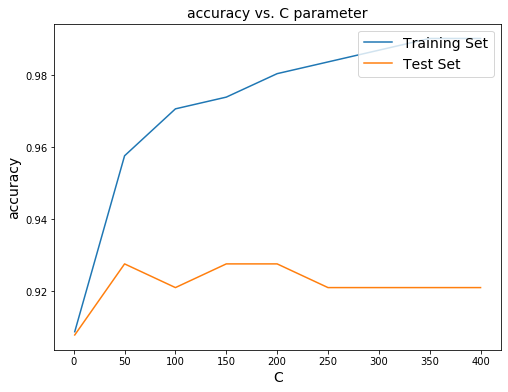

In [22]:
from sklearn.svm import SVC

C = [1, 50, 100, 150, 200, 250, 300, 350, 400]
cross_val_accuracy = []
trainaccuracy = []
testaccuracy = []
for c in C:
    classifier = SVC(C=c)
    scores = cross_val_score(classifier,X_train,y_train,cv = 5)
    cross_val_accuracy.append(np.mean(scores))
    classifier.fit(X_train,y_train)
    train_fit_y = classifier.predict(X_train)
    test_predict_y = classifier.predict(X_test)
    trainaccuracy.append(np.mean(train_fit_y==y_train))
    testaccuracy.append(np.mean(test_predict_y==y_test))
    
    
plt.figure(figsize=(8,6))
plt.plot(C, trainaccuracy, label="Training Set")
plt.plot(C, testaccuracy, label="Test Set")
plt.legend(loc='upper right', fontsize=14)
plt.title('accuracy vs. C parameter', fontsize=14)
plt.xlabel('C', fontsize=14)
plt.ylabel('accuracy', fontsize=14)



In [23]:
clf = SVC(C=150)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy = np.mean(y_pred==y_test)
print ("Final SVM Test Accuracy: ", accuracy)

Final SVM Test Accuracy:  0.9276315789473685


In [24]:
confusion_matrix(y_test, y_pred)

array([[119,   6],
       [  5,  22]])

######################### Confusion_Matrix #########################


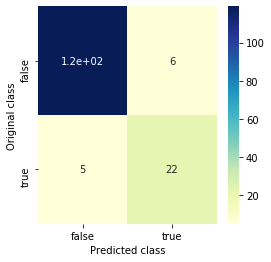

######################### Precision #########################


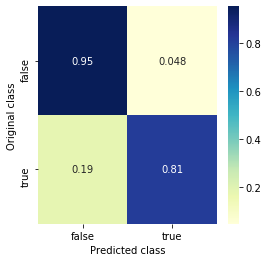

######################### Recall #########################


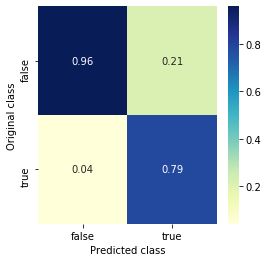

In [25]:
conf_matrix(y_test,y_pred)

Text(0, 0.5, 'accuracy')

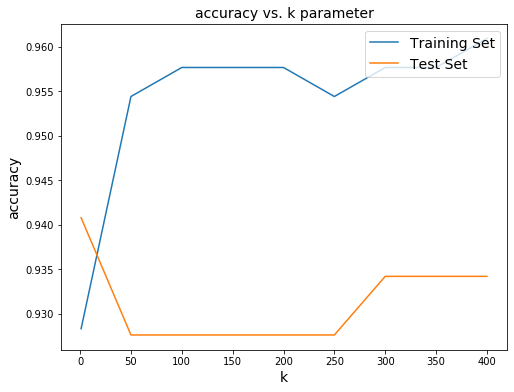

In [26]:
from sklearn.linear_model import LogisticRegression
C = [1, 50, 100, 150, 200, 250, 300, 350, 400]
cross_val_accuracy = []
trainaccuracy = []
testaccuracy = []
for c in C:
    classifier = LogisticRegression(C=c)
    scores = cross_val_score(classifier,X_train,y_train,cv = 5)
    cross_val_accuracy.append(np.mean(scores))
    classifier.fit(X_train,y_train)
    train_fit_y = classifier.predict(X_train)
    test_predict_y = classifier.predict(X_test)
    trainaccuracy.append(np.mean(train_fit_y==y_train))
    testaccuracy.append(np.mean(test_predict_y==y_test))
    
    
plt.figure(figsize=(8,6))
plt.plot(C, trainaccuracy, label="Training Set")
plt.plot(C, testaccuracy, label="Test Set")
plt.legend(loc='upper right', fontsize=14)
plt.title('accuracy vs. k parameter', fontsize=14)
plt.xlabel('k', fontsize=14)
plt.ylabel('accuracy', fontsize=14)



In [27]:
clf = LogisticRegression(C=250)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy = np.mean(y_pred==y_test)
print ("Final Test Accuracy:", accuracy)
print ("\nClassification Report:")
print(classification_report(y_test, y_pred))
print ("\nConfusion matrix:")
confusion_matrix(y_test, y_pred)

Final Test Accuracy: 0.9276315789473685

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       125
           1       0.81      0.78      0.79        27

    accuracy                           0.93       152
   macro avg       0.88      0.87      0.87       152
weighted avg       0.93      0.93      0.93       152


Confusion matrix:


array([[120,   5],
       [  6,  21]])

######################### Confusion_Matrix #########################


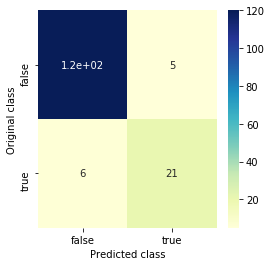

######################### Precision #########################


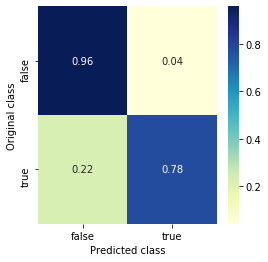

######################### Recall #########################


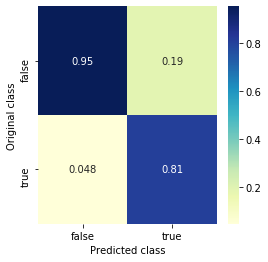

In [28]:
conf_matrix(y_test,y_pred)

Final Random Forest Test Accuracy:  0.9144736842105263


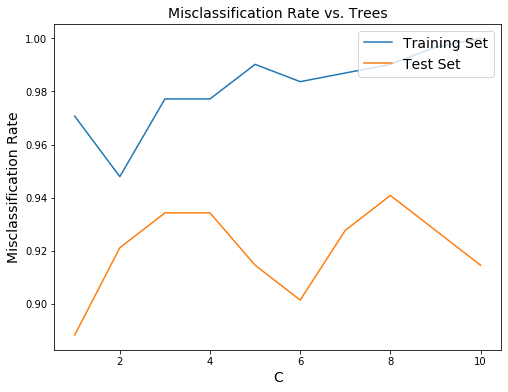

In [34]:
Cs = [1,2,3,4,5,6,7,8,9,10]
cvAccuracy = []
trainaccuracy = []
testaccuracy = []



for c in Cs:
    clf = RandomForestClassifier(n_estimators=c)
    scores = cross_val_score(clf, X,y, cv=5)
    cvAccuracy.append(np.mean(scores))
    clf.fit(X_train,y_train)
    y_fitted = clf.predict(X_train)
    y_pred = clf.predict(X_test)
    trainaccuracy.append(np.mean(y_fitted==y_train))
    testaccuracy.append(np.mean(y_pred==y_test))


plt.figure(figsize=(8,6))
plt.plot(Cs, trainaccuracy, label="Training Set")
plt.plot(Cs, testaccuracy, label="Test Set")
plt.legend(loc='upper right', fontsize=14)
plt.title('Misclassification Rate vs. Trees', fontsize=14)
plt.xlabel('C', fontsize=14)
plt.ylabel('Misclassification Rate', fontsize=14)

# Final Random Forest Classifier
clf = RandomForestClassifier(n_estimators=6)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy = np.mean(y_pred==y_test)
print ("Final Random Forest Test Accuracy: ", accuracy)

In [35]:
print ("\nClassification Report:")
print(classification_report(y_test, y_pred))
print ("\nConfusion matrix:")
confusion_matrix(y_test, y_pred)


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       125
           1       0.77      0.74      0.75        27

    accuracy                           0.91       152
   macro avg       0.86      0.85      0.85       152
weighted avg       0.91      0.91      0.91       152


Confusion matrix:


array([[119,   6],
       [  7,  20]])

######################### Confusion_Matrix #########################


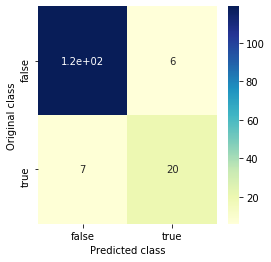

######################### Precision #########################


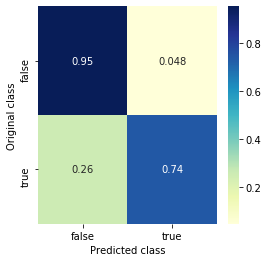

######################### Recall #########################


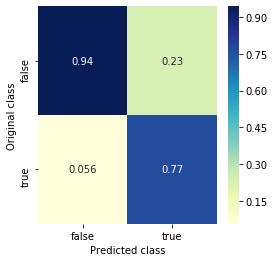

In [36]:
conf_matrix(y_test,y_pred)

Text(0, 0.5, 'Accuracy')

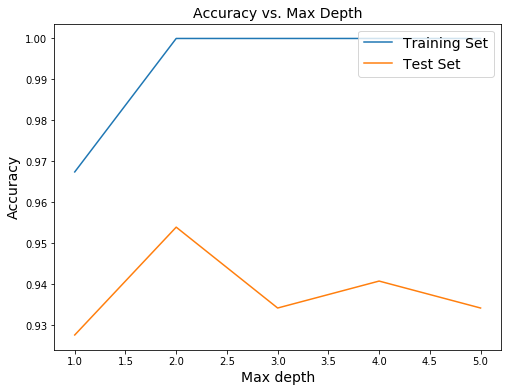

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
depths = [1, 2, 3, 4, 5]
cvAccuracy = []
trainaccuracy = []
testaccuracy = []

for d in depths:
    clf = GradientBoostingClassifier(max_depth=d, random_state=0)
    scores = cross_val_score(clf, X_train,y_train, cv=5)
    cvAccuracy.append(np.mean(scores))
    clf.fit(X_train,y_train)
    y_fitted = clf.predict(X_train)
    y_pred = clf.predict(X_test)
    trainaccuracy.append(np.mean(y_fitted==y_train))
    testaccuracy.append(np.mean(y_pred==y_test))

plt.figure(figsize=(8,6))
plt.plot(depths, trainaccuracy, label="Training Set")
plt.plot(depths, testaccuracy, label="Test Set")
plt.legend(loc='upper right', fontsize=14)
plt.title('Accuracy vs. Max Depth', fontsize=14)
plt.xlabel('Max depth', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

In [38]:
clf = GradientBoostingClassifier(max_depth=4, random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy = np.mean(y_pred==y_test)
print ("Final Test Accuracy:", accuracy)
print ("\nClassification Report:")
print(classification_report(y_test, y_pred))
print ("\nConfusion matrix:")
confusion_matrix(y_test, y_pred)

Final Test Accuracy: 0.9407894736842105

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       125
           1       0.88      0.78      0.82        27

    accuracy                           0.94       152
   macro avg       0.91      0.88      0.89       152
weighted avg       0.94      0.94      0.94       152


Confusion matrix:


array([[122,   3],
       [  6,  21]])

######################### Confusion_Matrix #########################


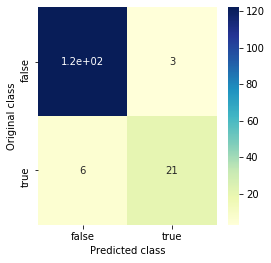

######################### Precision #########################


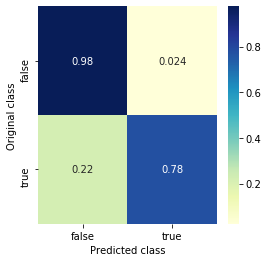

######################### Recall #########################


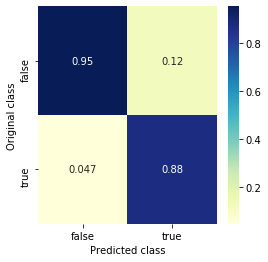

In [39]:
conf_matrix(y_test,y_pred)